<a href="https://colab.research.google.com/github/Mang0725/Netflix-Movie-Prediction/blob/main/Netflix_Movie_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# By analysing the data and various factors affecting the trend of Movies and Shows available on Netflix .**I used Data  Visualization To understand better data insights**



---

NETFLIX movies & TV Shows Prediction Model based on the dataset at the end

**Steps** - 

1.  Import Libraries
2.   Import Dataset
3.  Data Exploration
4.   Data Preprocessing
5.  Data Analysis and Visualization
6.  Feature Engineering
7. Feature Selection
8.  Modeling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df =pd.read_csv("/content/drive/MyDrive/Colab Notebooks/netflix_titles.csv.zip")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


# **Data Exploration**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
df.shape

(7787, 12)

In [ ]:
df.director.unique()
#director is the column name and unique function give unique value in sorted order form array

array([nan, 'Jorge Michel Grau', 'Gilbert Chan', ..., 'Josef Fares',
       'Mozez Singh', 'Sam Dunn'], dtype=object)

In [ ]:
# Now we r checking unquie values from cast column
df.cast.unique()

array(['João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi',
       'Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato',
       'Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim',
       ...,
       'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy',
       'Nasty C', 'Adriano Zumbo, Rachel Khoo'], dtype=object)

# **Data Preprocessing**

In [ ]:
df.duplicated().sum() 
#checking duplicate values

0

In [ ]:
#how much null values 
df.isnull().sum() 

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
print("percentage  of missing values")
Perc_Of_Missing_Values=df.isna().sum()/len(df)*100
Perc_Of_Missing_Values[Perc_Of_Missing_Values!=0]

percentage  of missing values


director      30.679337
cast           9.220496
country        6.510851
date_added     0.128419
rating         0.089893
dtype: float64

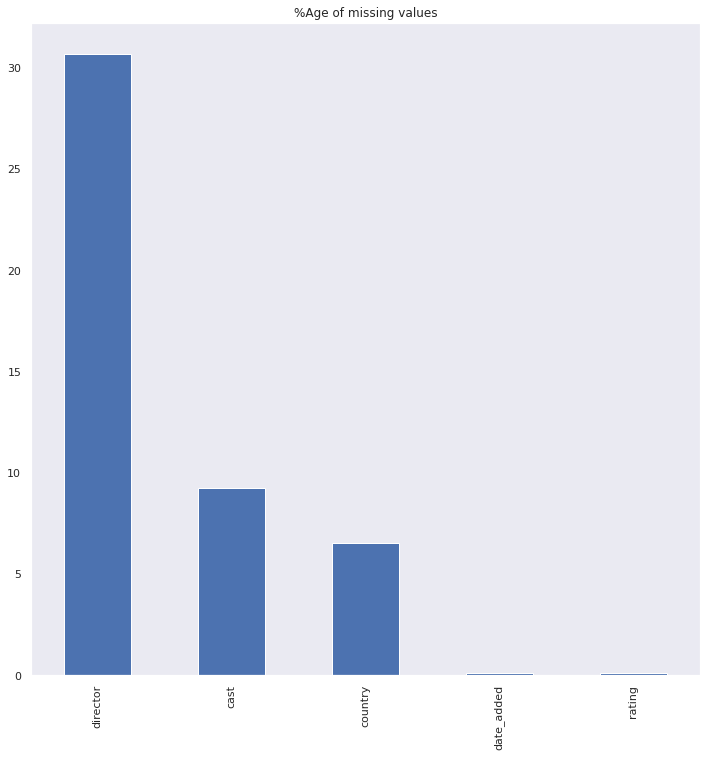

In [ ]:
only_missing=Perc_Of_Missing_Values[Perc_Of_Missing_Values!=0
]
only_missing.plot(kind="bar")
plt.title("%Age of missing values")
plt.show()

*show_id": Not that important. so i will be dropping this.
"director": Very less information-not needed for the analysis so I will be dropping this.
"cast": there are too many diferent values so I will be dropping this.
"country":Important variable hence we need to fix this.
"date_added": there are just a few cases, so lets scrap them.
"rating": there are just a few cases, so lets fix them.
"Description": Not that Important.So i will be dropping this.*

These columns aren't necessary

#cast,director,showid,description

In [ ]:
df.drop("cast" ,axis=1,inplace=True)
df.drop("director",axis=1,inplace=True)
df.drop("show_id",axis=1,inplace=True)
df.drop("description",axis=1,inplace=True)

In [ ]:
df.head()

,type,title,country,date_added,release_year,rating,duration,listed_in
0,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies"
2,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies"
3,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi..."
4,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas


In [ ]:
df["country"]=df["country"].fillna(df["country"].mode()[0])
df["rating"]=df["rating"].fillna(df["rating"].mode()[0])

In [ ]:
df[df.date_added.isna()]

,type,title,country,date_added,release_year,rating,duration,listed_in
258,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas"
549,TV Show,Anthony Bourdain: Parts Unknown,United States,NaN,2018,TV-PG,5 Seasons,Docuseries
2263,TV Show,Frasier,United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies"
2288,TV Show,Friends,United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies"
2555,TV Show,Gunslinger Girl,Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows"
3374,TV Show,Kikoriki,United States,NaN,2010,TV-Y,2 Seasons,Kids' TV
3492,TV Show,La Familia P. Luche,United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh..."
3946,TV Show,Maron,United States,NaN,2016,TV-MA,4 Seasons,TV Comedies
5137,TV Show,Red vs. Blue,United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ..."
6065,TV Show,The Adventures of Figaro Pho,Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies"


*We will drop these  Rows.They are only 10 Rows.Because it is difficult to add date of those rows*

In [ ]:
df=df[df["date_added"].notna()]

In [ ]:
df.isna().sum()

type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

check the Cleaned dataset

In [ ]:
df

,type,title,country,date_added,release_year,rating,duration,listed_in
0,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies"
2,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies"
3,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi..."
4,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas
...,...,...,...,...,...,...,...,...
7782,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies"
7783,Movie,Zubaan,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals"
7784,Movie,Zulu Man in Japan,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M..."
7785,TV Show,Zumbo's Just Desserts,Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV"


Let's make New Columns:

In [ ]:
df['year_added'] = df['date_added'].apply(lambda x: x.split(" ")[-1])
df['year_added'].head()

0    2020
1    2016
2    2018
3    2017
4    2020
Name: year_added, dtype: object

In [ ]:
df['month_added'] = df['date_added'].apply(lambda x: x.split(" ")[0])
df['month_added'].head()

0      August
1    December
2    December
3    November
4     January
Name: month_added, dtype: object

*Replacing Tv Shows with 0 & Movie with 1*

In [ ]:
df.replace({'	TV Show':0, 'Movie':1}, df["type"])

,type,title,country,date_added,release_year,rating,duration,listed_in,year_added,month_added
0,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",2020,August
1,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",2016,December
2,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies",2018,December
3,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",2017,November
4,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,2020,January
...,...,...,...,...,...,...,...,...,...,...
7782,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",2020,October
7783,Movie,Zubaan,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",2019,March
7784,Movie,Zulu Man in Japan,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...",2020,September
7785,TV Show,Zumbo's Just Desserts,Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",2020,October


In [ ]:
df['rating'].unique() #list of unique rating

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}  #replacing ratings ages with some category (older kids , adults , teens , kids)

In [ ]:
df['target_ages'] = df['rating'].replace(ratings_ages)
#replace the ratings with above category

df['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

In [ ]:
df

,type,title,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,target_ages
0,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",2020,August,Adults
1,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",2016,December,Adults
2,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies",2018,December,Adults
3,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",2017,November,Teens
4,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,2020,January,Teens
...,...,...,...,...,...,...,...,...,...,...,...
7782,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",2020,October,Adults
7783,Movie,Zubaan,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",2019,March,Teens
7784,Movie,Zulu Man in Japan,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...",2020,September,Adults
7785,TV Show,Zumbo's Just Desserts,Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",2020,October,Older Kids


# **EDA & Visualization**

In [ ]:
import plotly.graph_objects as go
val = df['type'].value_counts().index
cnt = df['type'].value_counts().values

fig = go.Figure([go.Bar(x=val, y=cnt, marker_color='yellowgreen')])
fig.update_layout(title_text='Netflix Sources Distribution', title_x=0.5)
fig.show()
#movie and tv show distribution

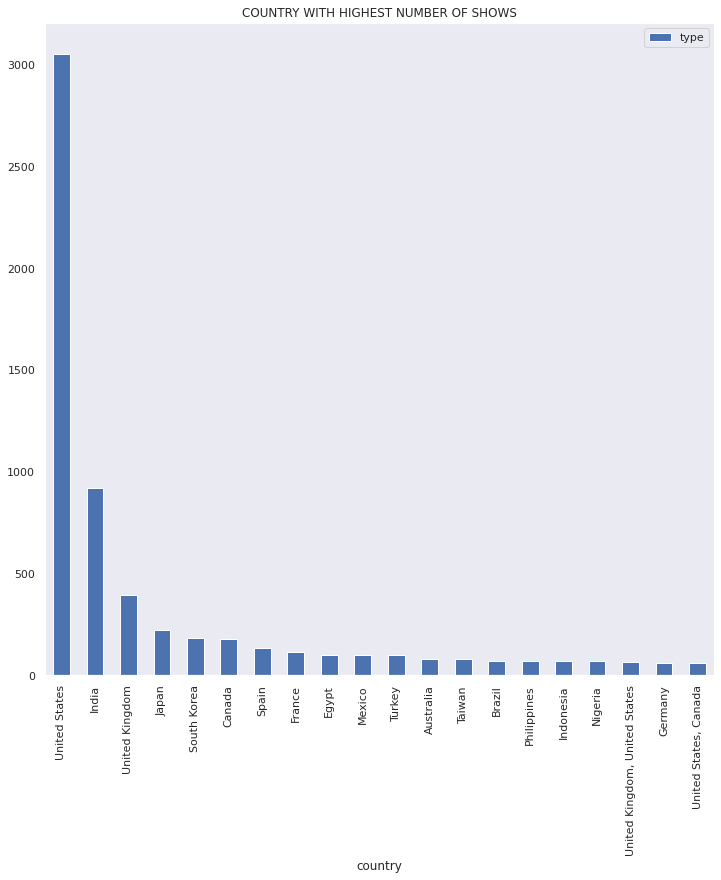

In [ ]:
countries=pd.crosstab(df["country"],["type"]).sort_values(by="type",ascending=False)
countries.head(20).plot(kind="bar")
plt.legend()
plt.title("COUNTRY WITH HIGHEST NUMBER OF SHOWS")
plt.show()
#country based on show 

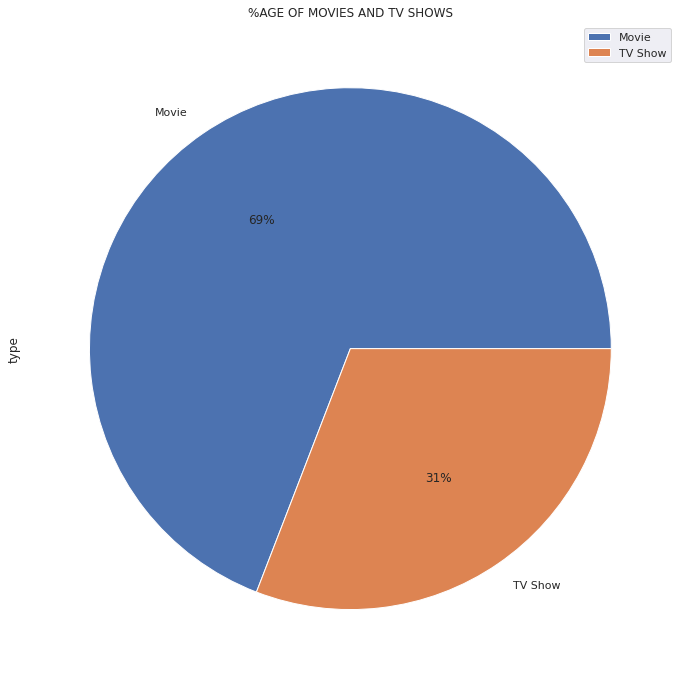

In [ ]:
df["type"].value_counts().plot(kind="pie",autopct="%1.0f%%")
plt.title("%AGE OF MOVIES AND TV SHOWS")
plt.legend()
plt.show()
#percentage of movie and tv show

In [ ]:
df_movie = df[df['type']=='Movie'].groupby('release_year').count()
df_tv = df[df['type']=='TV Show'].groupby('release_year').count()


df_movie.reset_index(level=0, inplace=True)
df_tv.reset_index(level=0, inplace=True)

# fig = px.line(data_movie, x="release_year", y="type")
# fig.show()

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_movie['release_year'], y=df_movie['type'],
                    mode='lines',
                    name='Movies', marker_color='mediumpurple'))
fig.add_trace(go.Scatter(x=df_tv['release_year'], y=df_tv['type'],
                    mode='lines',
                    name='TV Shows', marker_color='lightcoral'))
fig.update_layout(title_text='Trend Movies vs TV Shows in recent years', title_x=0.5)
fig.show()
#trend of movies and tv shows in recent year (from 1930 to 2020)




In [ ]:
df_movie = df[df['type']=='Movie'].groupby('year_added').count()
df_tv = df[df['type']=='TV Show'].groupby('year_added').count()


df_movie.reset_index(level=0, inplace=True)
df_tv.reset_index(level=0, inplace=True)

# fig = px.line(data_movie, x="year_added", y="type")
# fig.show()

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_movie['year_added'], y=df_movie['type'],
                    mode='lines',
                    name='Movies', marker_color='mediumpurple'))
fig.add_trace(go.Scatter(x=df_tv['year_added'], y=df_tv['type'],
                    mode='lines',
                    name='TV Shows', marker_color='lightcoral'))
fig.update_layout(title_text='Trend Movies vs TV Shows in year added', title_x=0.5)
fig.show()



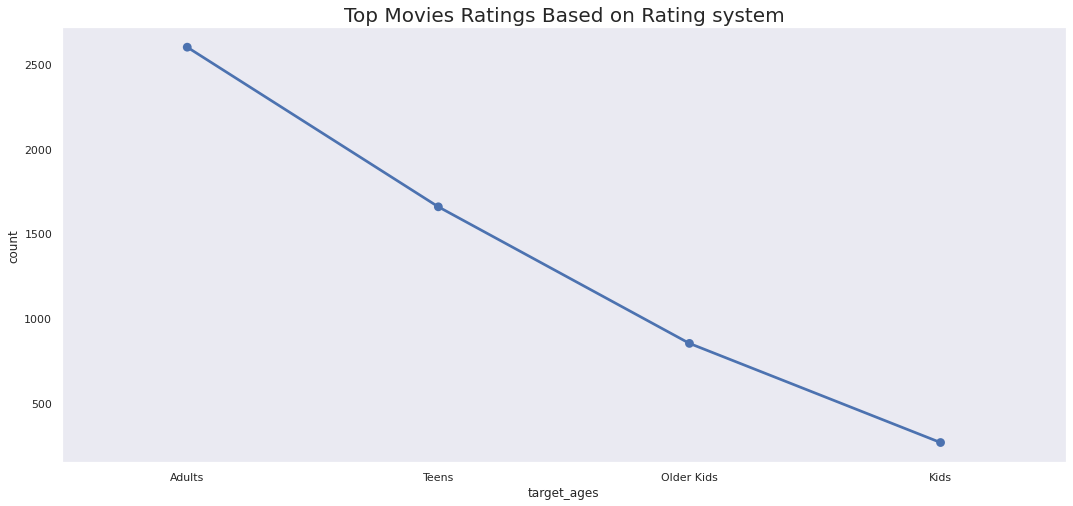

In [ ]:
df_tv=  df[df["type"] == "TV Show"]
df_movie = df[df["type"] == "Movie"]

movie_ratings = df_movie.groupby(['target_ages'])['type'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (18,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='target_ages' , y='count',data=movie_ratings)
plt.title('Top Movies Ratings Based on Rating system',size=20)

plt.show()
#movie rating

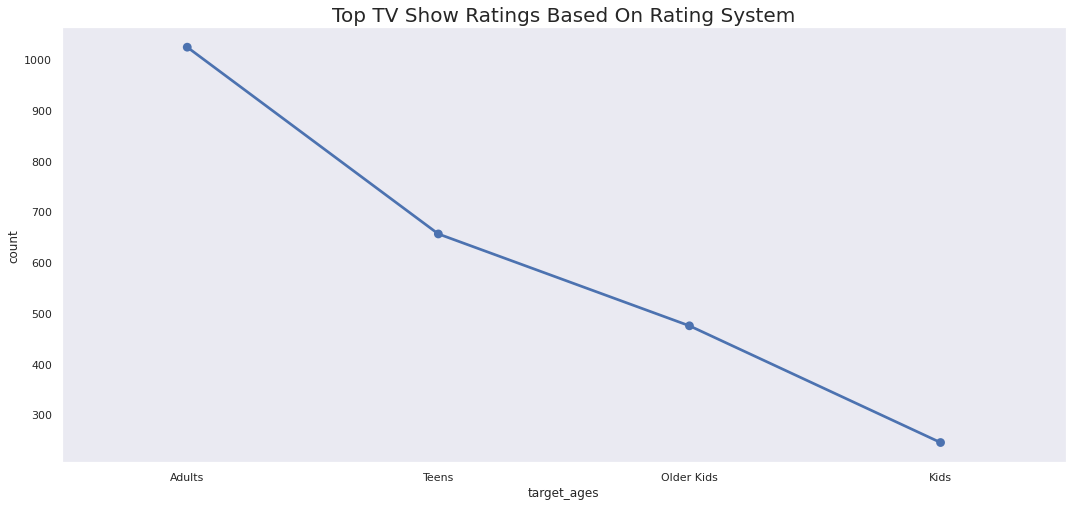

In [ ]:
tv_ratings = df_tv.groupby(['target_ages'])['type'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (18,8)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='target_ages',y='count',data=tv_ratings)
plt.title('Top TV Show Ratings Based On Rating System',size='20')
plt.show()
#tv show rating based on rating system

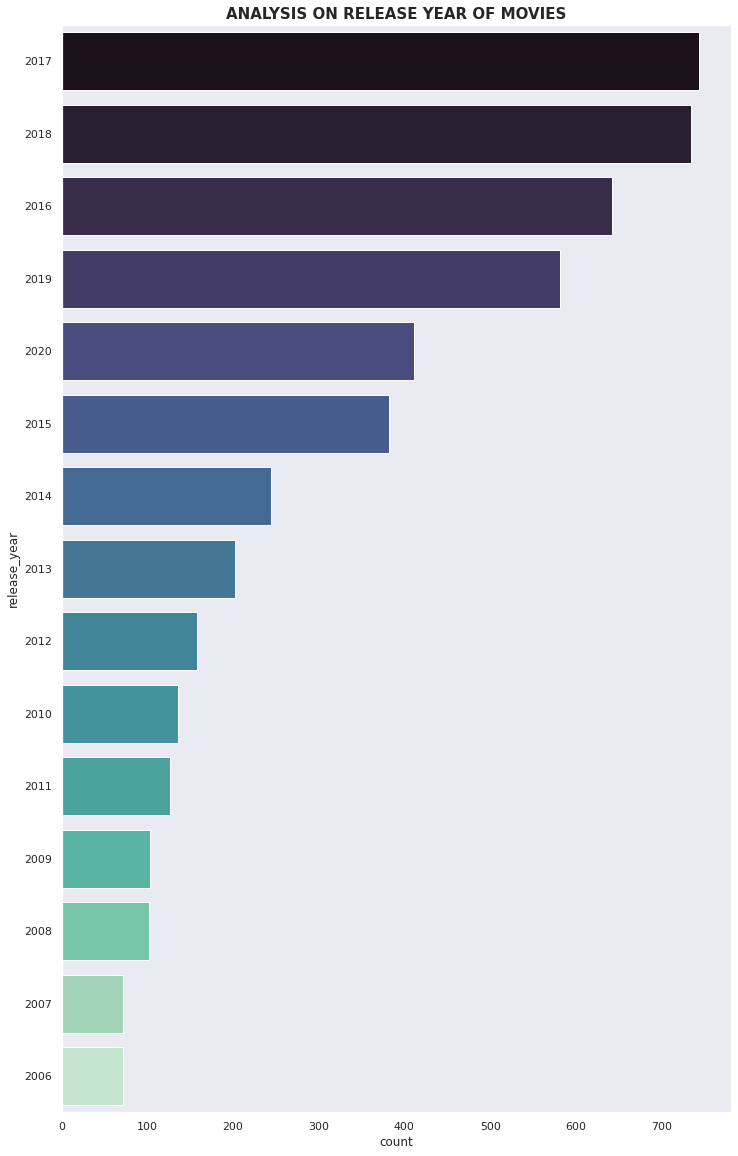

In [ ]:
plt.figure(figsize=(12,20))
sns.set(style="dark")
ax= sns.countplot(y="release_year" , data=df_movie , palette="mako" , order=df_movie['release_year'].value_counts().index[0:15])

plt.title('ANALYSIS ON RELEASE YEAR OF MOVIES' , fontsize = 15,fontweight="bold")
plt.show()

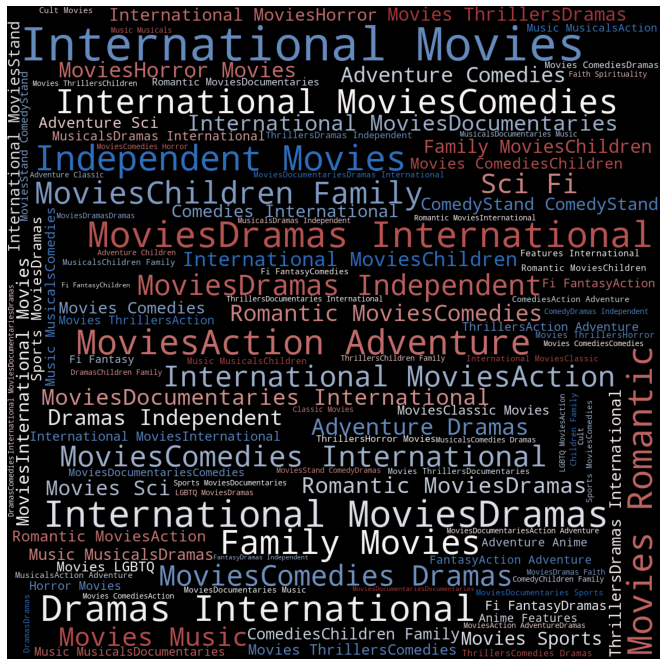

In [ ]:
from wordcloud import WordCloud,STOPWORDS

text = ''.join(df_movie['listed_in'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = "black",colormap="vlag" ,width = 1200 , height=1200 , max_words = 115).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

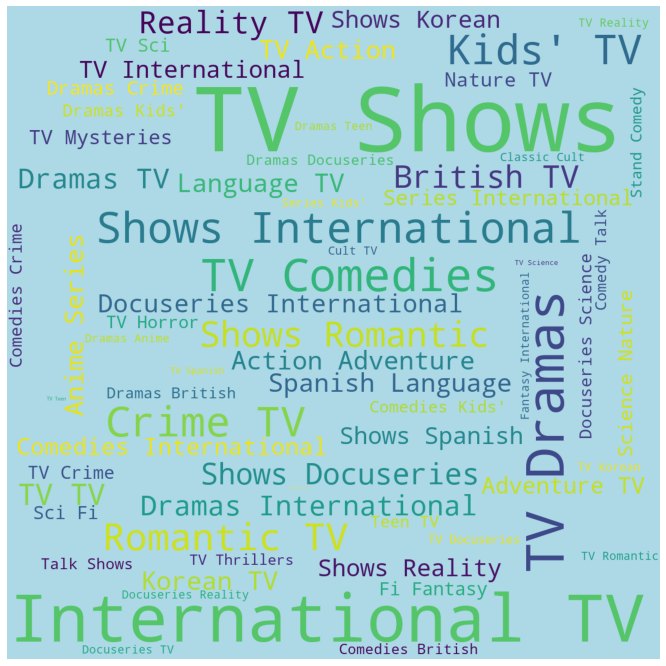

In [ ]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df_tv['listed_in'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'lightblue', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# **FEATURE ENGINEERING**

In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder
'''target_ages_enc = LabelEncoder()
target_ages_enc.fit(df['target_ages'])
df['target_ages_enc'] = target_ages_enc.transform(df['target_ages'])'''
#adults is replaced by 0 , teens is replaced by 1 , older kids is replaced by 2 and kids is replaced by 3

"target_ages_enc = LabelEncoder()\ntarget_ages_enc.fit(df['target_ages'])\ndf['target_ages_enc'] = target_ages_enc.transform(df['target_ages'])"

In [ ]:
#df.drop('target_ages', axis='columns', inplace=True)
type_enc = LabelEncoder()
type_enc.fit(df['type'])
df['type_enc'] = type_enc.transform(df['type'])


KeyError: ignored

In [ ]:
df.drop('type', axis='columns', inplace=True)

In [ ]:
df

,title,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,target_ages,type_enc
0,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",2020,August,Adults,1
1,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",2016,December,Adults,0
2,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies",2018,December,Adults,0
3,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",2017,November,Teens,0
4,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,2020,January,Teens,0
...,...,...,...,...,...,...,...,...,...,...,...
7782,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",2020,October,Adults,0
7783,Zubaan,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",2019,March,Teens,0
7784,Zulu Man in Japan,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...",2020,September,Adults,0
7785,Zumbo's Just Desserts,Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",2020,October,Older Kids,1


In [ ]:
title_enc = LabelEncoder()
title_enc.fit(df['title'])
df['title_enc'] = title_enc.transform(df['title'])

In [ ]:
df.drop('title', axis='columns', inplace=True)

In [ ]:
country_enc = LabelEncoder()
country_enc.fit(df['country'])
df['country_enc'] = country_enc.transform(df['country'])

In [ ]:
df.drop('country', axis='columns', inplace=True)

In [ ]:
df['date_added_date'] = df['date_added'].apply(lambda x: x.split(",")[-2])
df['date_added_date'].head()

0      August 14
1    December 23
2    December 20
3    November 16
4      January 1
Name: date_added_date, dtype: object

In [ ]:
df

,date_added,release_year,rating,duration,listed_in,year_added,month_added,target_ages,type_enc,title_enc,country_enc,date_added_date
0,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",2020,August,Adults,1,82,39,August 14
1,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",2016,December,Adults,0,124,308,December 23
2,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies",2018,December,Adults,0,67,379,December 20
3,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",2017,November,Teens,0,126,549,November 16
4,"January 1, 2020",2008,PG-13,123 min,Dramas,2020,January,Teens,0,60,549,January 1
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,"October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",2020,October,Adults,0,7749,429,October 19
7783,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",2019,March,Teens,0,7751,229,March 2
7784,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...",2020,September,Adults,0,7752,549,September 25
7785,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",2020,October,Older Kids,1,7753,12,October 31


In [ ]:
df['date_added_dates'] = df['date_added_date'].apply(lambda x: x.split(" ")[-1])
df['date_added_dates'].head()

0    14
1    23
2    20
3    16
4     1
Name: date_added_dates, dtype: object

In [ ]:
df

,date_added,release_year,rating,duration,listed_in,year_added,month_added,target_ages,type_enc,title_enc,country_enc,date_added_date,date_added_dates
0,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",2020,August,Adults,1,82,39,August 14,14
1,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",2016,December,Adults,0,124,308,December 23,23
2,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies",2018,December,Adults,0,67,379,December 20,20
3,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",2017,November,Teens,0,126,549,November 16,16
4,"January 1, 2020",2008,PG-13,123 min,Dramas,2020,January,Teens,0,60,549,January 1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,"October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",2020,October,Adults,0,7749,429,October 19,19
7783,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",2019,March,Teens,0,7751,229,March 2,2
7784,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...",2020,September,Adults,0,7752,549,September 25,25
7785,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",2020,October,Older Kids,1,7753,12,October 31,31


In [ ]:
df.drop('date_added', axis='columns', inplace=True)

In [ ]:
df.drop('date_added_date', axis='columns', inplace=True)

In [ ]:
df

,release_year,rating,duration,listed_in,year_added,month_added,target_ages,type_enc,title_enc,country_enc,date_added_dates
0,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",2020,August,Adults,1,82,39,14
1,2016,TV-MA,93 min,"Dramas, International Movies",2016,December,Adults,0,124,308,23
2,2011,R,78 min,"Horror Movies, International Movies",2018,December,Adults,0,67,379,20
3,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",2017,November,Teens,0,126,549,16
4,2008,PG-13,123 min,Dramas,2020,January,Teens,0,60,549,1
...,...,...,...,...,...,...,...,...,...,...,...
7782,2005,TV-MA,99 min,"Dramas, International Movies",2020,October,Adults,0,7749,429,19
7783,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",2019,March,Teens,0,7751,229,2
7784,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...",2020,September,Adults,0,7752,549,25
7785,2019,TV-PG,1 Season,"International TV Shows, Reality TV",2020,October,Older Kids,1,7753,12,31


In [ ]:
month_added_enc = LabelEncoder()
month_added_enc.fit(df['month_added'])
df['month_added_enc'] = month_added_enc.transform(df['month_added'])

In [ ]:
df.drop('month_added', axis='columns', inplace=True)

In [ ]:
year_added_enc = LabelEncoder()
year_added_enc.fit(df['year_added'])
df['year_added_enc'] = year_added_enc.transform(df['year_added'])

In [ ]:
df.drop('year_added', axis='columns', inplace=True)

In [ ]:
release_year_enc = LabelEncoder()
release_year_enc.fit(df['release_year'])
df['release_year_enc'] = release_year_enc.transform(df['release_year'])

In [ ]:
df

,release_year,rating,duration,listed_in,target_ages,type_enc,title_enc,country_enc,date_added_dates,month_added_enc,year_added_enc,release_year_enc
0,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",Adults,1,82,39,14,2,12,71
1,2016,TV-MA,93 min,"Dramas, International Movies",Adults,0,124,308,23,3,8,67
2,2011,R,78 min,"Horror Movies, International Movies",Adults,0,67,379,20,3,10,62
3,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",Teens,0,126,549,16,10,9,60
4,2008,PG-13,123 min,Dramas,Teens,0,60,549,1,5,12,59
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,2005,TV-MA,99 min,"Dramas, International Movies",Adults,0,7749,429,19,11,12,56
7783,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",Teens,0,7751,229,2,8,11,66
7784,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...",Adults,0,7752,549,25,12,12,70
7785,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Older Kids,1,7753,12,31,11,12,70


In [ ]:
df.drop('release_year', axis='columns', inplace=True)

In [ ]:
df

,rating,duration,listed_in,target_ages,type_enc,title_enc,country_enc,date_added_dates,month_added_enc,year_added_enc,release_year_enc
0,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",Adults,1,82,39,14,2,12,71
1,TV-MA,93 min,"Dramas, International Movies",Adults,0,124,308,23,3,8,67
2,R,78 min,"Horror Movies, International Movies",Adults,0,67,379,20,3,10,62
3,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",Teens,0,126,549,16,10,9,60
4,PG-13,123 min,Dramas,Teens,0,60,549,1,5,12,59
...,...,...,...,...,...,...,...,...,...,...,...
7782,TV-MA,99 min,"Dramas, International Movies",Adults,0,7749,429,19,11,12,56
7783,TV-14,111 min,"Dramas, International Movies, Music & Musicals",Teens,0,7751,229,2,8,11,66
7784,TV-MA,44 min,"Documentaries, International Movies, Music & M...",Adults,0,7752,549,25,12,12,70
7785,TV-PG,1 Season,"International TV Shows, Reality TV",Older Kids,1,7753,12,31,11,12,70


In [ ]:
rating_enc = LabelEncoder()
rating_enc.fit(df['rating'])
df['rating_enc'] = rating_enc.transform(df['rating'])

In [ ]:
df.drop('rating', axis='columns', inplace=True)

In [ ]:
duration_enc = LabelEncoder()
duration_enc.fit(df['duration'])
df['duration_enc'] = duration_enc.transform(df['duration'])

In [ ]:
df.drop('duration', axis='columns', inplace=True)

In [ ]:
listed_in_enc = LabelEncoder()
listed_in_enc.fit(df['listed_in'])
df['listed_in_enc'] = listed_in_enc.transform(df['listed_in'])

In [ ]:
df.drop('listed_in' , axis='columns',inplace=True)

In [ ]:
target_ages_enc = LabelEncoder()
target_ages_enc.fit(df['target_ages'])
df['target_ages_enc'] = target_ages_enc.transform(df['target_ages'])

In [ ]:
target_ages_enc = LabelEncoder()
target_ages_enc.fit(df['target_ages'])
df['target_ages_enc'] = target_ages_enc.transform(df['target_ages'])

In [ ]:
df.drop('target_ages', axis='columns',inplace=True)

In [ ]:
df

,type_enc,title_enc,country_enc,date_added_dates,month_added_enc,year_added_enc,release_year_enc,rating_enc,duration_enc,listed_in_enc,target_ages_enc
0,1,82,39,14,2,12,71,8,147,397,0
1,0,124,308,23,3,8,67,8,209,309,0
2,0,67,379,20,3,10,62,5,190,335,0
3,0,126,549,16,10,9,60,4,194,47,3
4,0,60,549,1,5,12,59,4,30,293,3
...,...,...,...,...,...,...,...,...,...,...,...
7782,0,7749,429,19,11,12,56,8,215,309,0
7783,0,7751,229,2,8,11,66,6,16,311,3
7784,0,7752,549,25,12,12,70,8,152,268,0
7785,1,7753,12,31,11,12,70,9,0,367,2


In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(df)

len(df.columns[constant_filter.get_support()])

constant_columns = [column for column in df.columns
                    if column not in df.columns[constant_filter.get_support()]]

df.drop(labels=constant_columns, axis=1, inplace=True)

In [ ]:
df

,type_enc,title_enc,country_enc,date_added_dates,month_added_enc,year_added_enc,release_year_enc,rating_enc,duration_enc,listed_in_enc,target_ages_enc
0,1,82,39,14,2,12,71,8,147,397,0
1,0,124,308,23,3,8,67,8,209,309,0
2,0,67,379,20,3,10,62,5,190,335,0
3,0,126,549,16,10,9,60,4,194,47,3
4,0,60,549,1,5,12,59,4,30,293,3
...,...,...,...,...,...,...,...,...,...,...,...
7782,0,7749,429,19,11,12,56,8,215,309,0
7783,0,7751,229,2,8,11,66,6,16,311,3
7784,0,7752,549,25,12,12,70,8,152,268,0
7785,1,7753,12,31,11,12,70,9,0,367,2


In [ ]:
qconstant_filter = VarianceThreshold(threshold=0.16)
qconstant_filter.fit(df)

VarianceThreshold(threshold=0.16)

In [ ]:
len(df.columns[qconstant_filter.get_support()])

11

In [ ]:
qconstant_columns = [column for column in df.columns
                    if column not in df.columns[qconstant_filter.get_support()]]

print(len(qconstant_columns))


0


# **Feature Selection**

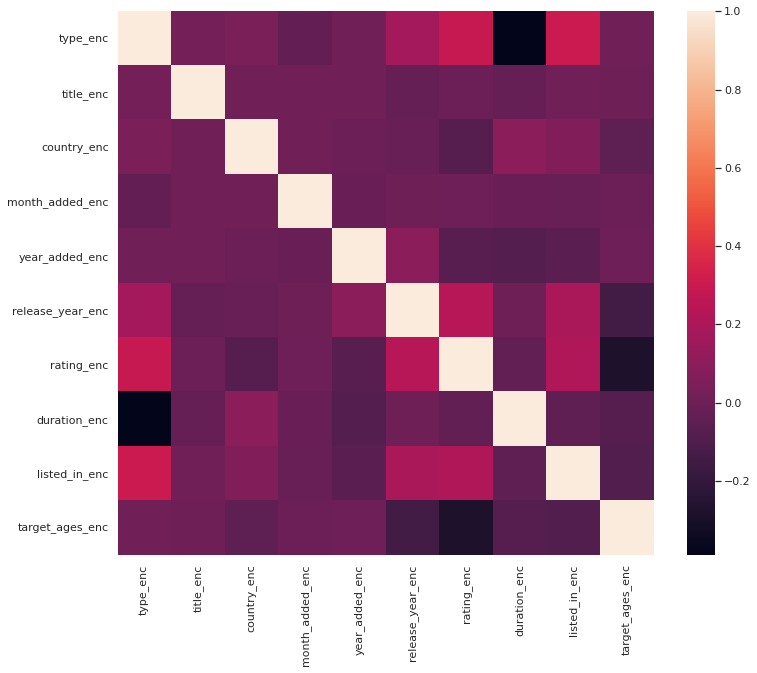

In [ ]:
corrmat = df.corr()
plt.subplots(figsize=(12,10))
sns.heatmap(corrmat)

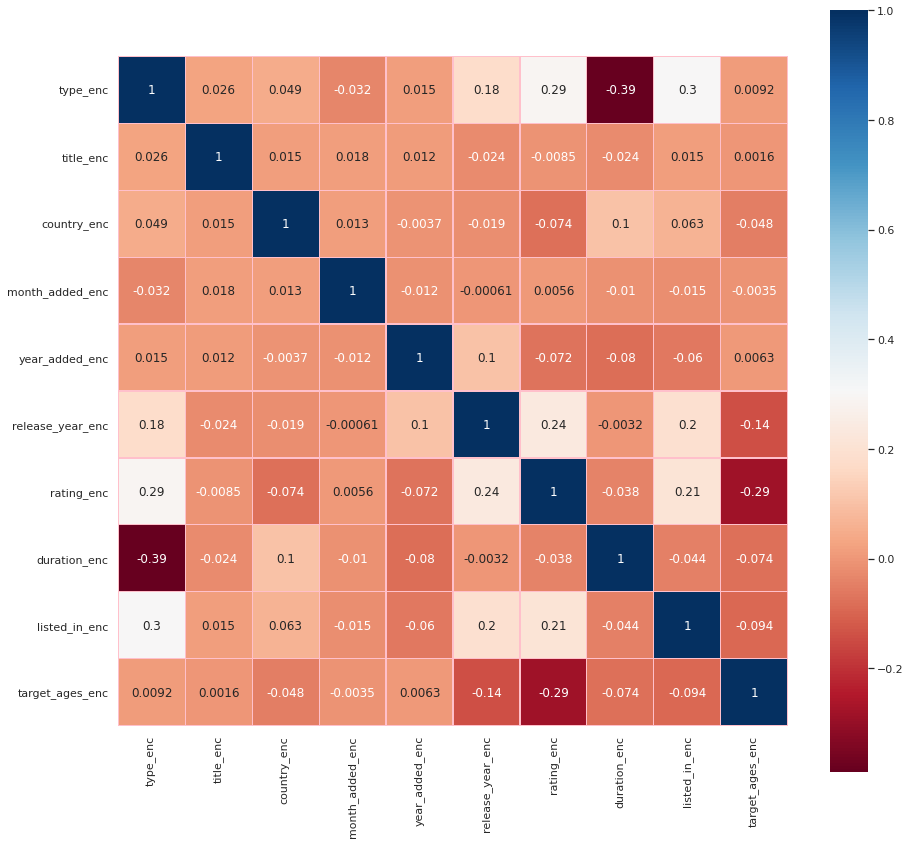

In [ ]:
colormap = plt.cm.RdBu
plt.subplots(figsize=(15,14))
sns.heatmap(df.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='pink' , annot=True)

In [ ]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if  (corr_matrix.iloc[i, j] >= threshold) :
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(df , 0.8)
len(set(corr_features))

0

In [ ]:
df.cov()

,type_enc,title_enc,country_enc,month_added_enc,year_added_enc,release_year_enc,rating_enc,duration_enc,listed_in_enc,target_ages_enc
type_enc,0.213394,2.692876e+01,3.956498,-0.052400,0.009374,0.700350,0.259921,-15.468720,17.437488,0.005613
title_enc,26.928755,5.040792e+06,5996.277521,138.957819,37.022891,-468.077289,-36.989198,-4634.270319,4269.469264,4.607124
country_enc,3.956498,5.996278e+03,30662.369370,8.045881,-0.907739,-29.090083,-25.259512,1520.632053,1376.593334,-11.063128
month_added_enc,-0.052400,1.389578e+02,8.045881,12.496946,-0.057773,-0.018639,0.038379,-3.130510,-6.845807,-0.016326
year_added_enc,0.009374,3.702289e+01,-0.907739,-0.057773,1.926943,1.203157,-0.194602,-9.563391,-10.495443,0.011566
release_year_enc,0.700350,-4.680773e+02,-29.090083,-0.018639,1.203157,74.060846,3.978009,-2.393014,211.092180,-1.595819
rating_enc,0.259921,-3.698920e+01,-25.259512,0.038379,-0.194602,3.978009,3.772875,-6.332255,51.308285,-0.730428
duration_enc,-15.468720,-4.634270e+03,1520.632053,-3.130510,-9.563391,-2.393014,-6.332255,7434.084351,-475.827982,-8.401468
listed_in_enc,17.437488,4.269469e+03,1376.593334,-6.845807,-10.495443,211.092180,51.308285,-475.827982,15651.904872,-15.557151
target_ages_enc,0.005613,4.607124e+00,-11.063128,-0.016326,0.011566,-1.595819,-0.730428,-8.401468,-15.557151,1.737182


In [ ]:
y=df.iloc[:,[10]] #target column

In [ ]:
df.drop(df.columns[10],axis=1,inplace=True)

In [ ]:
x=df

# **modeling**

In [ ]:
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts = train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtr,ytr)
    pred=knn.predict(xts)
    res1=accuracy_score(yts,pred)
print("K Nearest Neighbors Top 5 Success Rates is:" , "{:.2f}%".format(100*res1))

K Nearest Neighbors Top 5 Success Rates is: 47.56%


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

rf.fit(xtr,ytr)
pred1=rf.predict(xts)
res2=accuracy_score(yts,pred1)
print("Random Forest Classifier Success Rate is :", "{:.2f}%".format(100*res2))

Random Forest Classifier Success Rate is : 99.55%


In [ ]:
lst = [res1 , res2]

In [ ]:
lst

[0.4755784061696658, 0.9955012853470437]

In [ ]:
lst2 = ["KNearestNeighbours" , "RandomForest"]

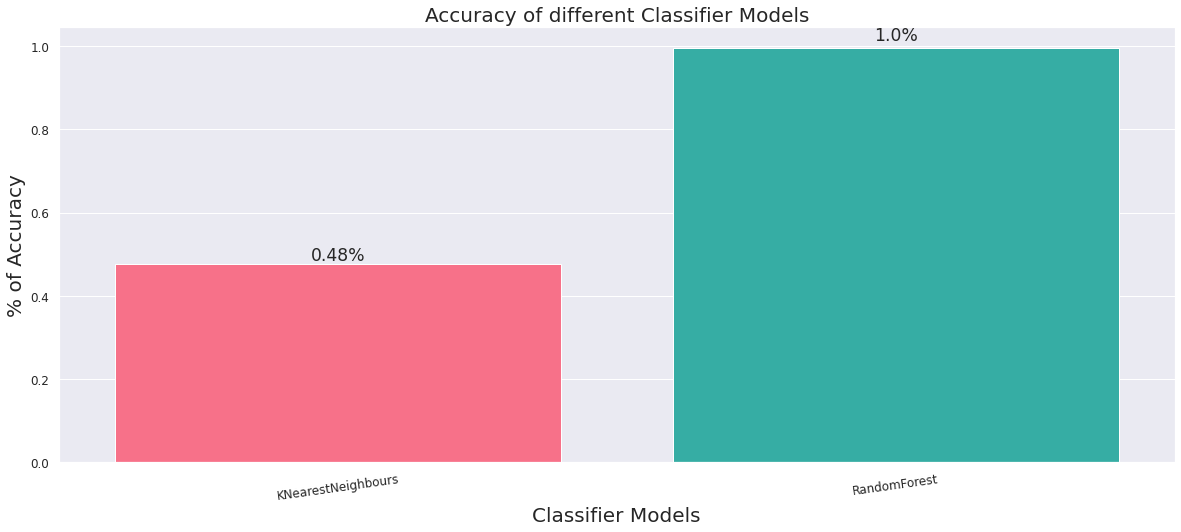

In [ ]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=lst2, y=lst, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()